<a href="https://colab.research.google.com/github/kotoha-code/Kotoha_Noda/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# データをpandasで直接URLから読み込む
import pandas as pd

train_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(train_url)

# データの最初の5行を表示
print("Titanicデータセット:")
print(df.head())

Titanicデータセット:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [ ]:
print("データ全体の情報:")
df.info()

データ全体の情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("データ全体の情報：")
df.info()

データ全体の情報：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("\n数値データの基本統計量：")
df.describe()


数値データの基本統計量：


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(f"\n全体の生存率：{df['Survived'].mean():.2%}")


全体の生存率：38.38%


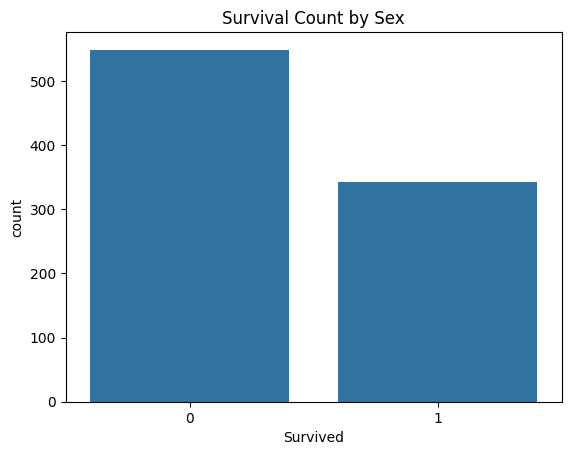

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

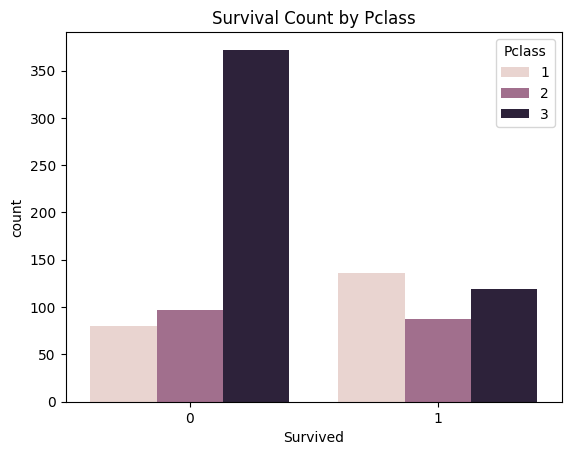

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.show()

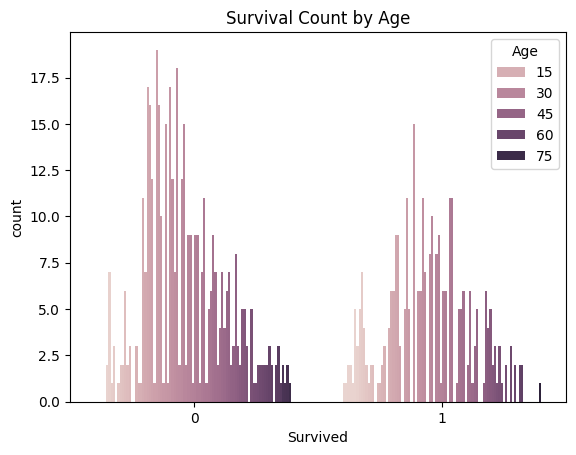

In [ ]:
sns.countplot(x='Survived', hue='Age', data=df)
plt.title('Survival Count by Age')
plt.show()

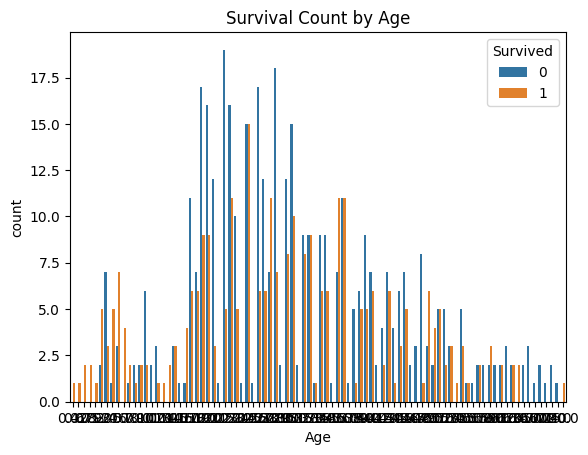

In [ ]:
sns.countplot( x='Age', hue='Survived', data=df)
plt.title('Survival Count by Age')
plt.show()

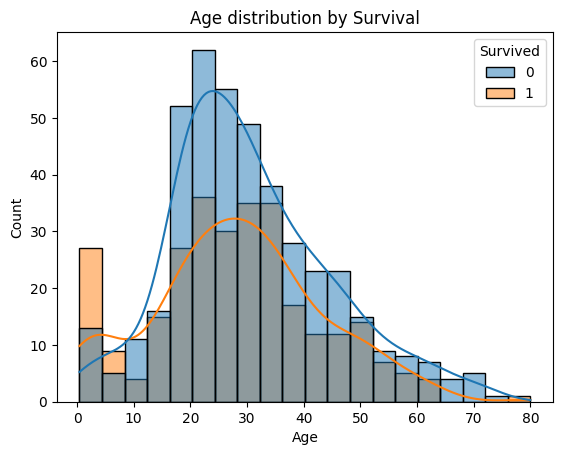

In [ ]:
sns.histplot(df, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age distribution by Survival')
plt.show()

In [ ]:
df_processed=df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [ ]:
df_processed['Sex']=df_processed['Sex'].map({'male':0,'female':1})
df_processed=pd.get_dummies(df_processed,columns=['Embarked'], drop_first=True)

In [ ]:
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)

/tmp/ipython-input-2134546458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
/tmp/ipython-input-2134546458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
print("\n前処理後のデータ情報：")
df_processed.info()

print("\n前処理後のデータ先頭5桁：")
print(df_processed.head())


前処理後のデータ情報：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB

前処理後のデータ先頭5桁：
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0 

In [ ]:
X=df_processed.drop('Survived',axis=1)
y=df_processed['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)
print("model learning completed")

model learning completed


In [ ]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 78.77%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 1. データとラベルを分ける
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# 2. 訓練データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. モデルをランダムフォレストに変更！
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, oob_score=True)

# 4. 学習
model.fit(X_train, y_train)

# 5. 予測と評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n【中央値補完 + ランダムフォレスト】モデルの正解率: {accuracy:.2%}")


【中央値補完 + ランダムフォレスト】モデルの正解率: 81.56%


In [ ]:
import pandas as pd

# データの読み込み
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# --- ステップ1: 事前に訓練データの統計量を計算 ---
# 欠損値補完に使う値を、必ず「訓練データ(train_df)」から計算しておく
age_median_for_filling = train_df['Age'].median()
fare_median_for_filling = train_df['Fare'].median()

# --- ステップ2: 前処理用の関数を定義 ---
def preprocess(df, age_fill_value, fare_fill_value):
    """
    訓練データとテストデータに共通の前処理を行う関数
    """
    # Name, Ticket, Cabinは不要なので削除
    df_processed = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    # Sexを 0/1 に変換
    df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})


    df_processed = pd.get_dummies(df_processed, columns=['Embarked'], drop_first=True)

    # AgeとFareの欠損値を、引数で渡された値で埋める
    df_processed['Age'] = df_processed['Age'].fillna(age_fill_value)
    df_processed['Fare'] = df_processed['Fare'].fillna(fare_fill_value)

    # 処理済みのデータフレームを返す
    return df_processed

# --- ステップ3: 関数を使って前処理を実行 ---
# 訓練データとテストデータの両方に、「訓練データから計算した中央値」を使って前処理
train_processed_df = preprocess(train_df, age_median_for_filling, fare_median_for_filling)
test_processed_df = preprocess(test_df, age_median_for_filling, fare_median_for_filling)


# --- ステップ4: モデル学習の準備 ---
# 特徴量から'Survived'と'PassengerId'を除く
# (PassengerIdは特徴量ではないが、提出時に必要)
features = train_processed_df.drop(['Survived', 'PassengerId'], axis=1).columns

X_train = train_processed_df[features]
y_train = train_processed_df['Survived']
X_test = test_processed_df[features]

print("前処理とデータ準備が完了しました！")
print("学習に使う特徴量:", features.tolist())

前処理とデータ準備が完了しました！
学習に使う特徴量: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [ ]:
# モデルを準備（例：ランダムフォレスト）
final_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# ★すべての訓練データを使って学習させる★
final_model.fit(X_train, y_train)

# ★テストデータを使って、生存するかどうかを予測させる★
predictions = final_model.predict(X_test)

# predictionsの中身
print(predictions[:10]) # 最初の10件を表示

[0 0 0 0 1 0 1 0 1 0]


In [ ]:
# test_dfから乗客IDを取得
passenger_ids = test_df['PassengerId']

# 提出用データフレームを作成
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# CSVファイルとして出力する
submission_df.to_csv('submission.csv', index=False)

print("'submission.csv' が作成されました！")

'submission.csv' が作成されました！
